In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import joblib

%matplotlib inline

Mounted at /content/drive


Importing Datasets

In [2]:
path1 = '/content/drive/MyDrive/Datasets_Colab/flights.csv'
df_flights = pd.read_csv(path1)

<ipython-input-2-87b47109ac77>:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv(path1)


Dataset Description

In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [4]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Handeling Missing Values

In [5]:
df_flights.isnull().sum().sort_values(ascending=False)/5819079*100

,0
CANCELLATION_REASON,98.455357
WEATHER_DELAY,81.724960
LATE_AIRCRAFT_DELAY,81.724960
AIRLINE_DELAY,81.724960
SECURITY_DELAY,81.724960
AIR_SYSTEM_DELAY,81.724960
AIR_TIME,1.805629
ARRIVAL_DELAY,1.805629
ELAPSED_TIME,1.805629
WHEELS_ON,1.589822


In [6]:
# Unnecessary Features & Features with Missing Values more than 80%
df_flights.drop(['YEAR','CANCELLATION_REASON','WEATHER_DELAY','LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','SECURITY_DELAY','AIR_SYSTEM_DELAY'], axis=1, inplace=True)
df_flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [7]:
# Imputing Missing Values
time_features = ['DEPARTURE_TIME','ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON']
duration_features = ['AIR_TIME','TAXI_OUT','TAXI_IN','ELAPSED_TIME','SCHEDULED_TIME']
duration_features_2signs = ['DEPARTURE_DELAY','ARRIVAL_DELAY']

for feature in time_features:
  df_flights[feature] = df_flights[feature].fillna(0)

for feature in duration_features:
  df_flights[feature] = df_flights[feature].fillna(df_flights[feature].mean())

def fill_nans_2signs (x):
  if pd.isna(x):
    if np.random.rand() < len(pos_v)/ (len(pos_v) + len(neg_v)):
      return mean_pos
    else:
      return mean_neg
  else:
    return x

for feature in duration_features_2signs:
  pos_v =  df_flights[feature][df_flights[feature] >= 0]
  neg_v =  df_flights[feature][df_flights[feature] < 0]
  mean_pos = pos_v.mean()
  mean_neg = neg_v.abs().mean()*-1
  df_flights[feature] = df_flights[feature].apply(fill_nans_2signs)

# Checking Again for Nulls
df_flights.isnull().sum().sort_values(ascending=False)/5819079*100

,0
TAIL_NUMBER,0.252978
MONTH,0.000000
SCHEDULED_TIME,0.000000
DIVERTED,0.000000
ARRIVAL_DELAY,0.000000
ARRIVAL_TIME,0.000000
SCHEDULED_ARRIVAL,0.000000
TAXI_IN,0.000000
WHEELS_ON,0.000000
DISTANCE,0.000000


array([[<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'FLIGHT_NUMBER'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'TAXI_OUT'}>],
       [<Axes: title={'center': 'WHEELS_OFF'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>,
        <Axes: title={'center': 'AIR_TIME'}>],
       [<Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'WHEELS_ON'}>,
        <Axes: title={'center': 'TAXI_IN'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'DIVERTED'}>,
        <Axes: title={'center': 'CANCELLED'}>]], dtype=object)

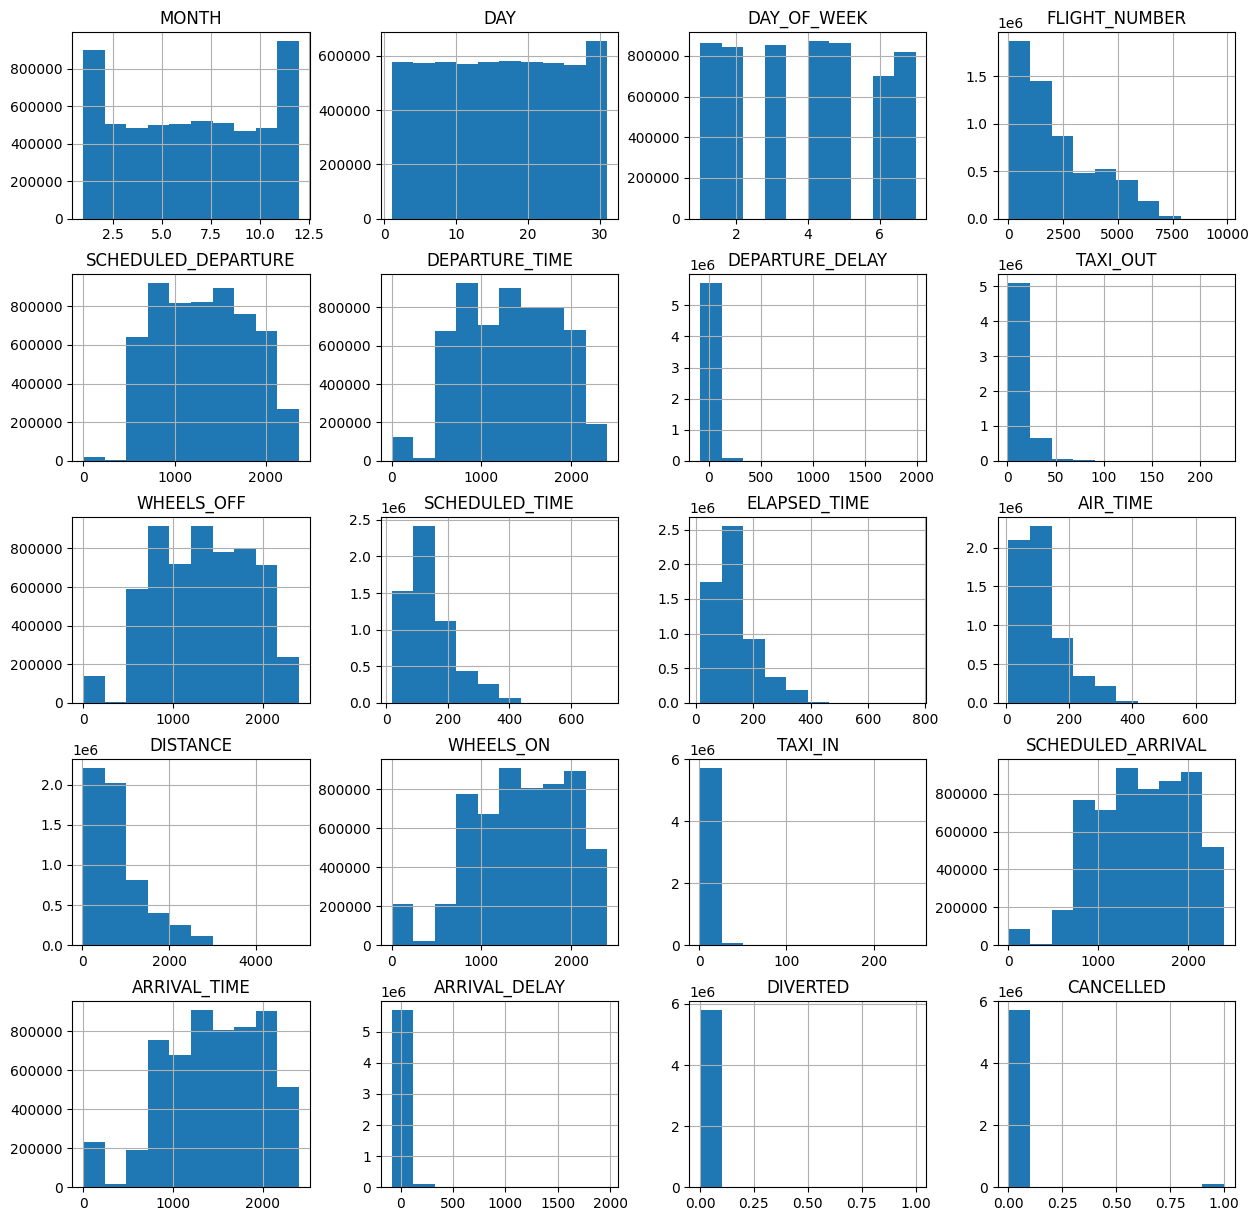

In [8]:
df_flights.hist(figsize=(15,15))

In [9]:
# Check for Duplicated Rows
df_flights[df_flights.duplicated()]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED


Handeling Skewed Features

In [10]:
skewed_features = ['DISTANCE','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME']
df_flights[skewed_features].skew()

,0
DISTANCE,1.422468
SCHEDULED_TIME,1.344859
ELAPSED_TIME,1.365607
AIR_TIME,1.390957


Encoding Categorical Variables

In [11]:
cat_ft = (df_flights.select_dtypes(include='object').columns).tolist()

In [12]:
df_flights[cat_ft].nunique()

,0
AIRLINE,14
TAIL_NUMBER,4897
ORIGIN_AIRPORT,930
DESTINATION_AIRPORT,930


In [13]:
def Encoding_Categorical_Variables(df):

  l = (df_flights['AIRLINE'].unique()).tolist()
  l = {value: i for i, value in enumerate(l)}
  df['AIRLINE'] = df['AIRLINE'].map(l)
  return df

In [14]:
df_flights = Encoding_Categorical_Variables(df_flights)

# EDA "Explaratory Data Analysis"

array([[<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'AIRLINE'}>,
        <Axes: title={'center': 'FLIGHT_NUMBER'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'TAXI_OUT'}>,
        <Axes: title={'center': 'WHEELS_OFF'}>],
       [<Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>,
        <Axes: title={'center': 'AIR_TIME'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'WHEELS_ON'}>],
       [<Axes: title={'center': 'TAXI_IN'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'DIVERTED'}>],
       [<Axes: title={'

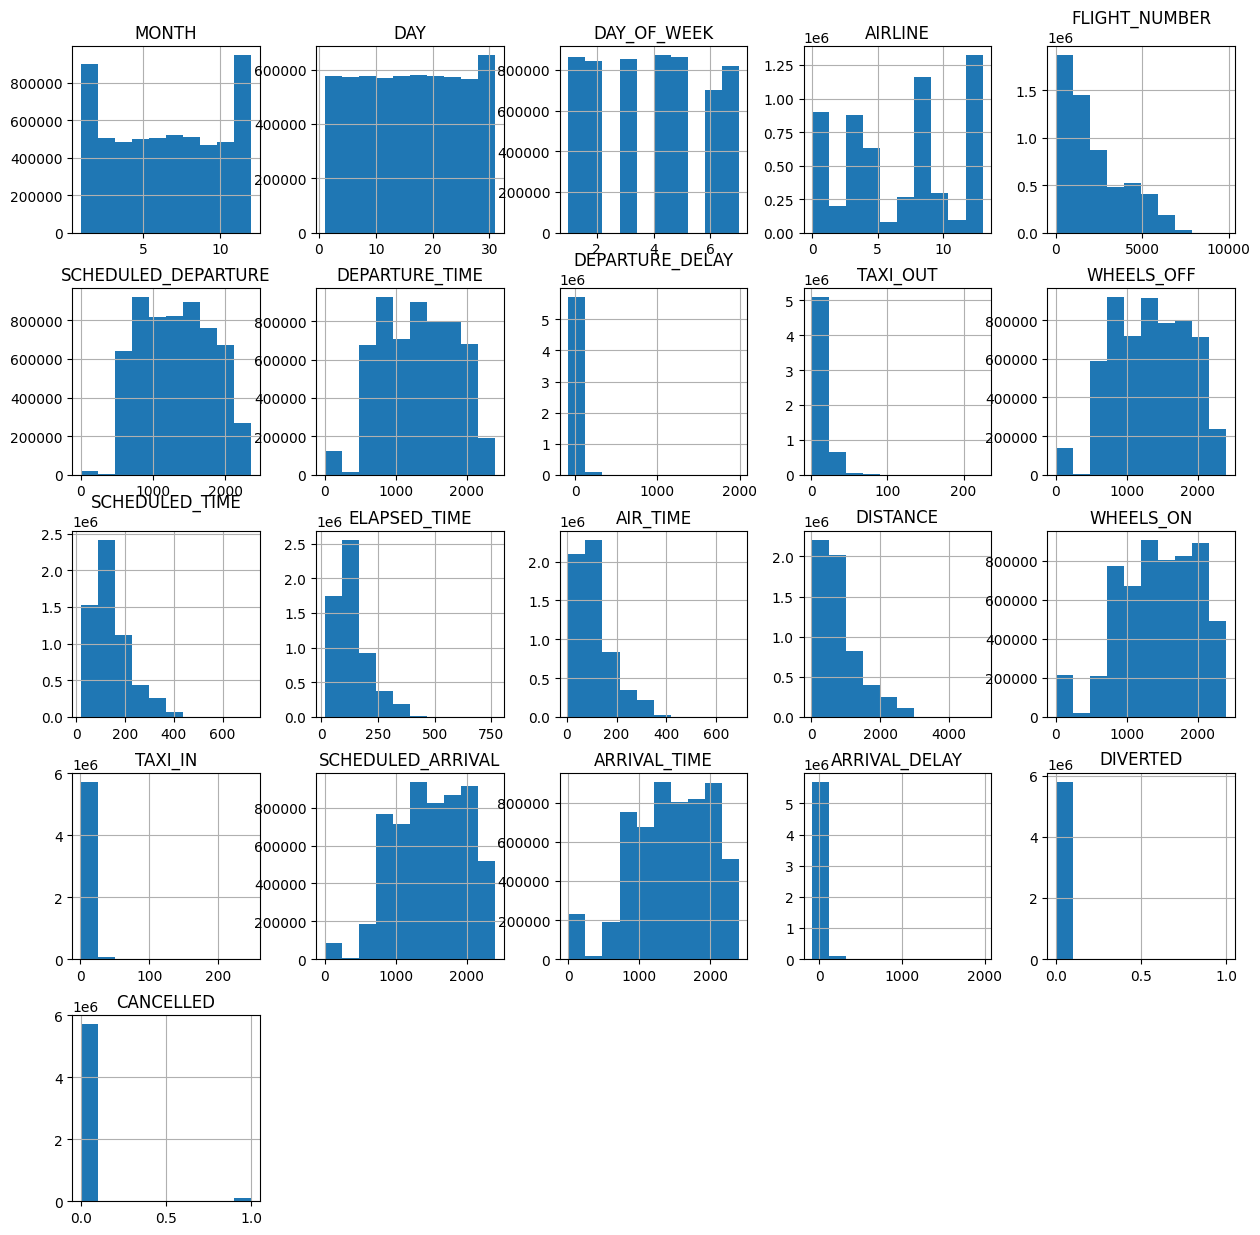

In [15]:
# Features Distributions
df_flights.hist(figsize=(15,15))

Flights Volume Over Days

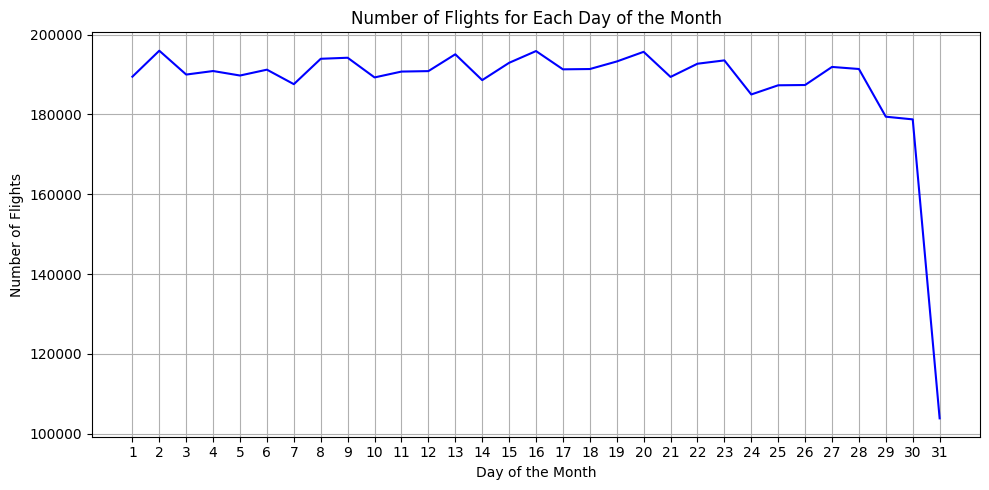

In [16]:
day_counts = df_flights['DAY'].value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10, 5))
plt.plot(day_counts.index, day_counts.values,linestyle='-', color='blue')
plt.title('Number of Flights for Each Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.xticks(range(1, 32))  # Ensure all days are shown (1 to 31)
plt.tight_layout()
plt.show()

Average Delays Over Days

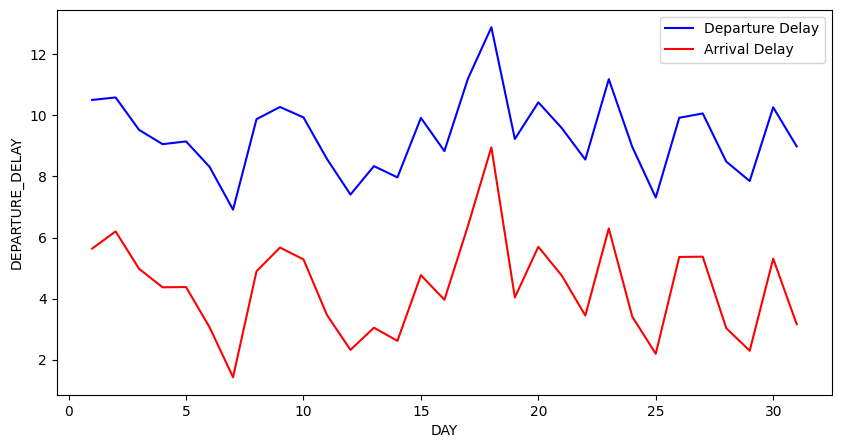

In [17]:
avg_delays = (df_flights.groupby('DAY')[['DEPARTURE_DELAY','ARRIVAL_DELAY']]).mean()
# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x='DAY',y='DEPARTURE_DELAY',data=avg_delays,color='blue',label='Departure Delay')
sns.lineplot(x='DAY',y='ARRIVAL_DELAY',data=avg_delays,color='red',label='Arrival Delay')
plt.show()

Average of Delays Over Each time of the Day

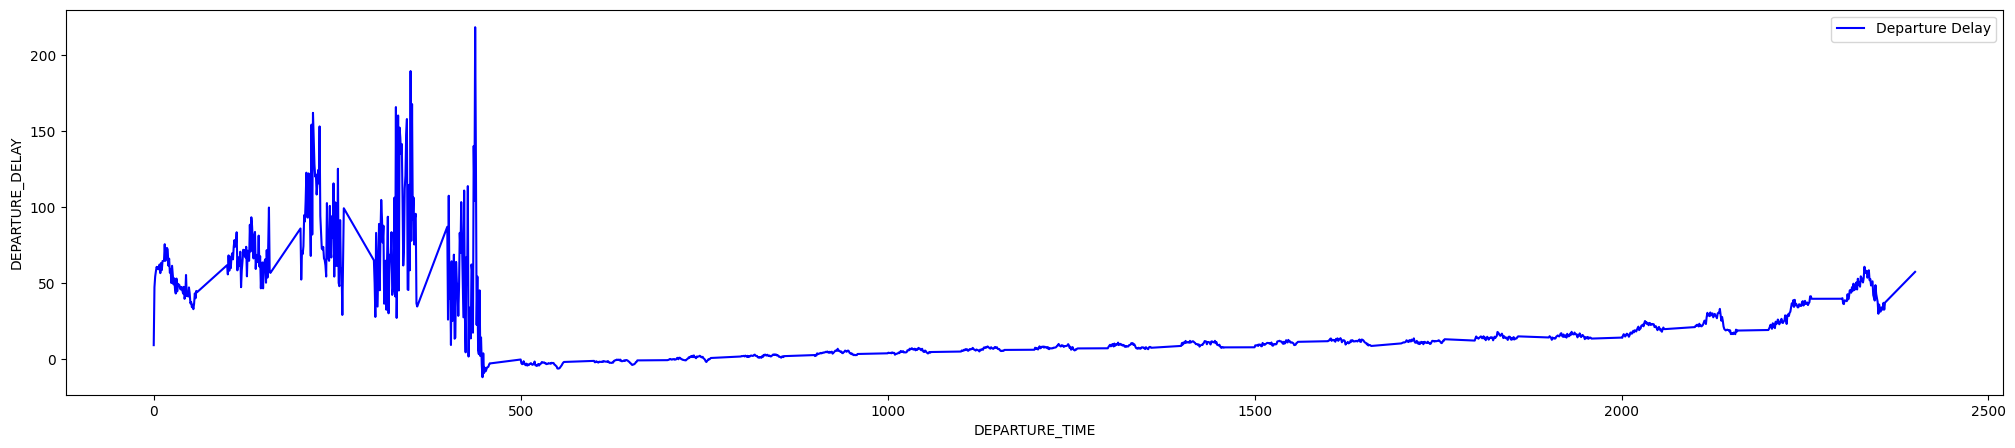

In [18]:
avg_time_delays = (df_flights.groupby('DEPARTURE_TIME')[['DEPARTURE_DELAY','ARRIVAL_DELAY']]).mean()

plt.figure(figsize=(25,5))
sns.lineplot(x='DEPARTURE_TIME',y='DEPARTURE_DELAY', data=avg_time_delays, color='blue', label='Departure Delay')
plt.show()

Heat Map for Correlations Between Features

In [19]:
df_num = (df_flights.select_dtypes(include=['int64','float64']).columns).tolist()

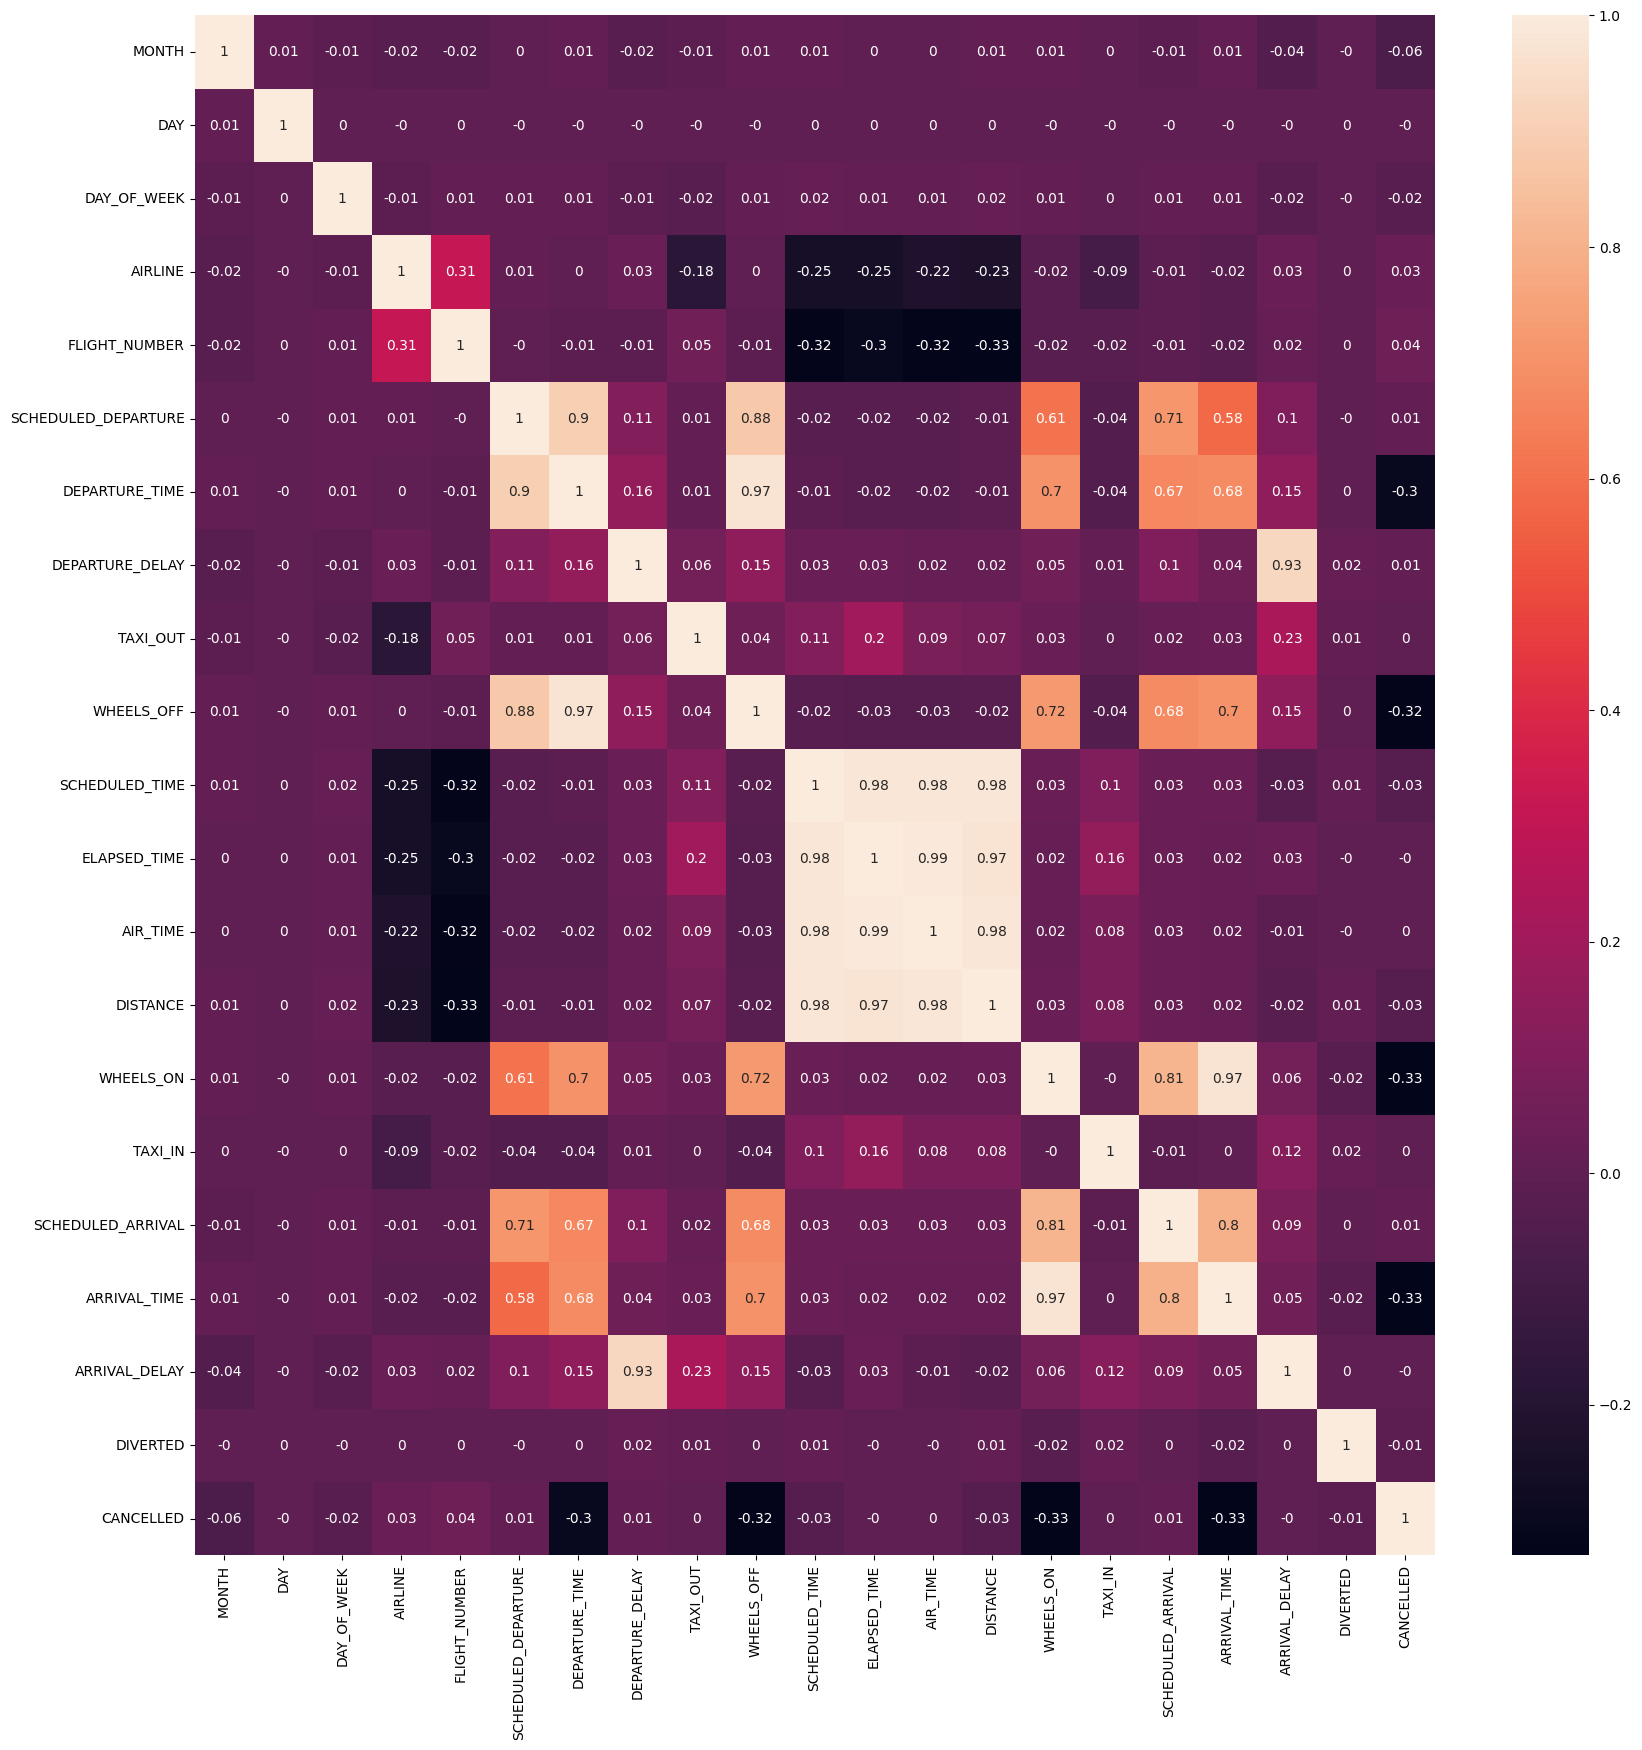

In [20]:
corr = df_flights[df_num].corr().round(3)
plt.figure(figsize=(20,20))
sns.heatmap(corr.round(2),annot=True)
plt.show()

# Feature Engineering

In [21]:
def convert_to_timestamp(time_value):
    """
    Convert time in the form 1 to 2400 into a clock timestamp.
    """
    # Ensure the time value is zero-padded to 4 digits
    time_str = f"{time_value:04d}"

    # Extract hours and minutes
    hours = int(time_str[:2])
    minutes = int(time_str[2:])

    # Handle invalid time values
    if hours > 23 or minutes > 59:
        return None  # Return None for invalid times like 2400

    # Format as a timestamp
    #return datetime.strptime(f"{hours:02d}:{minutes:02d}", "%H:%M").time()
    return f"{hours:02d}:{minutes:02d}"

In [22]:
def time_to_mins(time):
  hours = time // 100
  mins = time % 100
  return hours*60 + mins

In [23]:
def feature_engineering(df):

  # Feature 2 SEASON
  df['SEASON'] = df['MONTH'].map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})
  # Feature 3 Gap between Departure and Arrival Delays
  df['DELAYS_GAP'] = df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']
  # Feature 4 Distance Categories
  df.loc[df['DISTANCE'] <= 373, 'DISTANCE'] = 1 #short
  df.loc[(df['DISTANCE'] > 373) & (df['DISTANCE'] < 1062), 'DISTANCE'] = 2 #medium
  df.loc[df['DISTANCE'] >= 1062, 'DISTANCE'] = 3 #long
  # Feature 5 Time Difference between real Departure and Arrival
  df['ARRIVAL_TIME_time'] = df['ARRIVAL_TIME'].apply(time_to_mins)
  df['DEPARTURE_TIME_time'] = df['DEPARTURE_TIME'].apply(time_to_mins)
  df['time_diff'] = df['ARRIVAL_TIME_time'] - df['DEPARTURE_TIME_time']
  #df.drop(['ARRIVAL_TIME_time','DEPARTURE_TIME_time'], inplace=True)
  return df

In [24]:
df_flights = feature_engineering(df_flights)

In [25]:
# Using Log Transformation
df_flights[skewed_features] = np.log(df_flights[skewed_features])

Collecting Historical Dynamic Features grouped by AIRLINE

In [26]:
def Transforming_hist_data(df):
  fts = ['WHEELS_ON','WHEELS_OFF','DEPARTURE_TIME']
  hist_fts = []
  for f in fts:
    df[f] = df[f].apply(time_to_mins)
    flights_hist = df.groupby('AIRLINE')[f].agg('median').reset_index()
    flights_hist.rename(columns={'median': f'{f}_MED'}, inplace=True)
    df = df.merge(flights_hist,on='AIRLINE', how='left')
    hist_fts.append(f'{f}_y')
  return df, df[hist_fts]

In [27]:
df_flights, df_hist = Transforming_hist_data(df_flights)

In [28]:
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].astype(int).apply(convert_to_timestamp)

In [29]:
df_flights.dropna(inplace=True)
df_flights['ARRIVAL_TIME'].isnull().sum()

0

Preparing time clock features before fedding into the model

In [30]:
def time_to_mins(time_str):
  hours,mins = map(int, time_str.split(':'))
  return hours*60 + mins

In [31]:
def encode_cyclic_time_features(mins, period=1440):
  sin_col = np.sin(2*np.pi*mins/period)
  cos_col = np.cos(2*np.pi*mins/period)
  return sin_col,cos_col

In [32]:
df_flights["ARRIVAL_TIME_mins"] = df_flights['ARRIVAL_TIME'].apply(time_to_mins)

In [33]:
def Encoding_time_features(df):
  df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].astype(int).apply(convert_to_timestamp)
  df.dropna(inplace=True)
  df["SCHEDULED_ARRIVAL_mins"] = df['SCHEDULED_ARRIVAL'].apply(time_to_mins)
  df["SCHEDULED_ARRIVAL_mins_sin"],df["SCHEDULED_ARRIVAL_mins_cos"] = zip(*df["SCHEDULED_ARRIVAL_mins"].apply(encode_cyclic_time_features))
  return df

In [34]:
df_flights = Encoding_time_features(df_flights)

In [39]:
df_num = (df_flights.select_dtypes(include=['int64','float64']).columns).tolist()
corr = df_flights[df_num].corr().round(3)
corr['ARRIVAL_TIME_mins'].abs().sort_values(ascending=False)

,ARRIVAL_TIME_mins
ARRIVAL_TIME_time,1.000
ARRIVAL_TIME_mins,1.000
WHEELS_ON_x,0.971
SCHEDULED_ARRIVAL_mins,0.810
WHEELS_OFF_x,0.696
SCHEDULED_ARRIVAL_mins_sin,0.685
DEPARTURE_TIME_time,0.674
DEPARTURE_TIME_x,0.674
SCHEDULED_DEPARTURE,0.588
SCHEDULED_ARRIVAL_mins_cos,0.542


Selecting Best Features for The Target Variable

In [40]:
# These are Static Features that are set before the flight and don't change during the flight + AVG of dynamic features grouped by Airline
Selected_features =  ["AIRLINE","SCHEDULED_ARRIVAL_mins_sin","SCHEDULED_ARRIVAL_mins_cos","SEASON","WHEELS_ON_y","WHEELS_OFF_y","DEPARTURE_TIME_y","DISTANCE"]

# Splitting Dataset into Train and Test Sets

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df_flights[Selected_features], df_flights['ARRIVAL_TIME_mins'], test_size=0.1, random_state=42)

In [42]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5221710, 8), (5221710,), (580190, 8), (580190,))

# Feature Scaling

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
ln = LinearRegression()
ln.fit(x_train, y_train)
yt_pred = ln.predict(x_train)
y_pred = ln.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2t = r2_score(y_train,yt_pred)
r2 = r2_score(y_test,y_pred)

print(f'LinearRegression - R2 score: {r2t}')
print(f'LinearRegression - R2 score: {r2}, RMSE: {rmse}')

LinearRegression - R2 score: 0.5738089953596259
LinearRegression - R2 score: 0.5767274578713324, RMSE: 214.6387268729481


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(x_train,y_train)

yt_pred = rf_regressor.predict(x_train)
y_pred = rf_regressor.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2t = r2_score(y_train,yt_pred)
r2 = r2_score(y_test,y_pred)
print(f'RandomForestRegressor - R2 score: {r2t}')
print(f'RandomForestRegressor - R2 score: {r2}, RMSE: {rmse}')

RandomForestRegressor - R2 score: 0.7119456983177248
RandomForestRegressor - R2 score: 0.7033721086850073, RMSE: 179.68177436623404


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, random_state=42)
gbr.fit(x_train,y_train)


yt_pred = gbr.predict(x_train)
y_pred = gbr.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2t = r2_score(y_train,yt_pred)
r2 = r2_score(y_test,y_pred)
print(f'Gradient Boosting Regressor - R2 score: {r2t}')
print(f'Gradient Boosting Regressor - R2 score: {r2}, RMSE: {rmse}')

Gradient Boosting Regressor - R2 score: 0.5962145039360136
Gradient Boosting Regressor - R2 score: 0.5985349155626014, RMSE: 209.0364039655968


In [ ]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.001, l1_ratio=0.1 ,random_state=42)
enet.fit(x_train,y_train)

yt_pred = enet.predict(x_train)
y_pred = enet.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2t = r2_score(y_train,yt_pred)
r2 = r2_score(y_test,y_pred)
print(f'ElasticNet - R2 score: {r2t}')
print(f'ElasticNet - R2 score: {r2}, RMSE: {rmse}')

ElasticNet - R2 score: 0.56535361722904
ElasticNet - R2 score: 0.5653208633131449, RMSE: 219.43227224710648


# Saving The Best Model

In [ ]:
joblib.dump(rf_regressor, 'model.pkl')  # Save the trained model
joblib.dump(sc, 'scaler.pkl')  # Save the scaler

['scaler_f.pkl']

# Prediction Result

In [ ]:
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
d

,Actual,Predicted
2347109,855,836
3560053,1380,1322
4539899,1170,1213
3103357,1384,1186
5067105,690,708
...,...,...
5721796,1090,1011
1720432,1421,1113
1539133,806,808
678482,1098,1077


 # Conclusion
 Although the model achieves a 70% accuracy, which may seem modest, this performance is reasonable given the nature of the task and the available data features. The inclusion of dynamic data provided critical context to improve the model’s predictions, but the inherent unpredictability of flight delays sets a natural upper bound on performance. Future improvements could involve integrating additional external data sources, such as real-time weather reports, air traffic control data or any additional features will enhance prediction accuracy further.

In [ ]:
def convert_to_hhmm(minutes):
    hours = (minutes - 1) // 60  # Convert to zero-based hours
    mins = (minutes - 1) % 60   # Compute the minutes
    return f"{hours:02}:{mins:02}"

In [ ]:
d['Actual'] = d['Actual'].apply(convert_to_hhmm)
d['Predicted'] = d['Predicted'].apply(convert_to_hhmm)
d

,Actual,Predicted
2347109,14:14,13:55
3560053,22:59,22:01
4539899,19:29,20:12
3103357,23:03,19:45
5067105,11:29,11:47
...,...,...
5721796,18:09,16:50
1720432,23:40,18:32
1539133,13:25,13:27
678482,18:17,17:56


In [ ]:
d[(d['Actual'] == d['Predicted'])]

,Actual,Predicted
1294620,12:08,12:08
2507651,13:08,13:08
5052981,11:33,11:33
3209442,16:21,16:21
83254,11:02,11:02
...,...,...
2007042,11:43,11:43
4740093,14:47,14:47
5606828,11:05,11:05
2263531,12:42,12:42


In [ ]:
d.to_csv('predictions.csv', index=False)